In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from scipy.stats import multivariate_normal as mnorm

### Fonts

In [73]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Create 1D Data

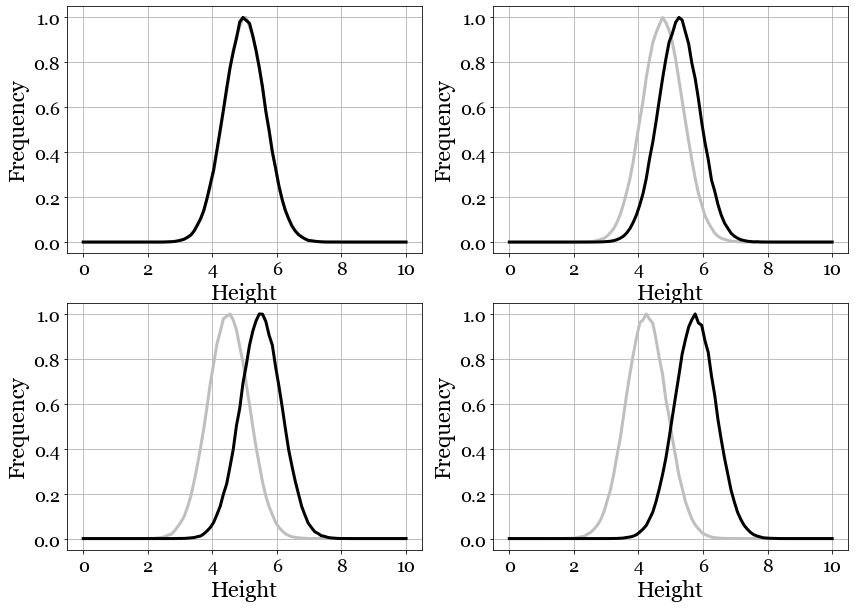

In [109]:
outputs = []
plt.figure(figsize=(14,10))
npoints = 500000
for i in range(4):
    plt.subplot(2,2,i+1)
    cval = (i/4)
    mean = (i/4)
    X1 = mnorm.rvs(5+mean, cov=0.4,size=int(npoints/2));
    X2 = mnorm.rvs(5-mean, cov=0.4,size=int(npoints/2));
    X3 = np.ones((npoints,1))
    X = np.hstack((X1,X2))
    X = np.expand_dims(X,-1)
    y = np.hstack([np.zeros(int(npoints/2)), np.ones(int(npoints/2))])
    h1 = np.histogram(X1,np.linspace(0,10,101));
    h2 = np.histogram(X2,np.linspace(0,10,101));
    clf = LogisticRegression(random_state=0).fit(X, y)
    yprob = clf.predict_proba(X)
    outputs.append(yprob)
    h1 = h1[0]
    h1 = h1 / np.max(h1)
    h2 = h2[0]
    h2 = h2 / np.max(h2)
    plt.grid()
    plt.plot(np.linspace(0,10,100),h2,c=(0.75,0.75,0.75),linewidth=3);
    plt.plot(np.linspace(0,10,100),h1,c=(0,0,0),linewidth=3);
    plt.xlabel('Height',fontsize=22,**csfont);
    plt.ylabel('Frequency',fontsize=22,**csfont);
    plt.xticks(fontsize=18,**csfont);
    plt.yticks(fontsize=18,**csfont);
plt.savefig('../../assets/matplotlib/015_roc1.png',dpi=300,bbox_inches="tight")

### Compute TPR and FPR for each threshold value between 0..1

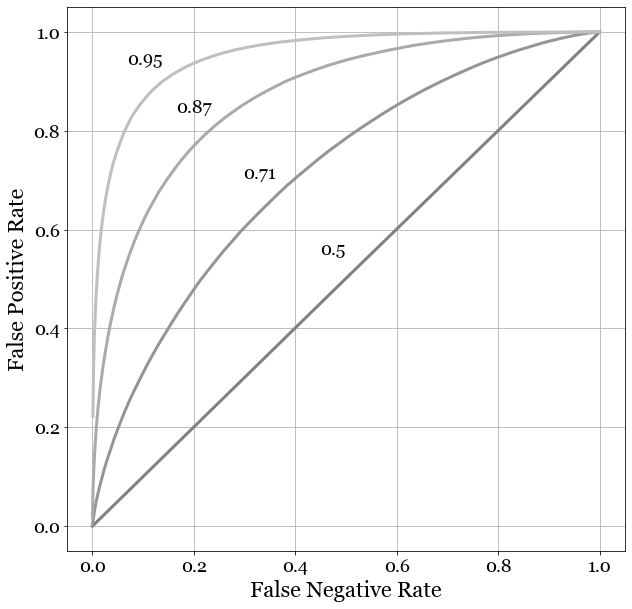

In [110]:
plt.figure(figsize=(10,10))
for j in range(4):
    mean = j/4
    yprob = outputs[j]
    tpr = []
    fpr = []
    for i in range(100):
        threshold = i/100
        ypred = (yprob > threshold)*1.0
        ypred = ypred[:,0]
        P = np.sum(y == 1)
        N = np.sum(y == 0)   
        TP = np.sum(y + ypred == 2)
        FP = np.sum(ypred - y == 1)
        TPR = TP / P
        FPR = FP / N
        tpr.append(TPR)
        fpr.append(FPR)
    tpr = np.array(tpr)
    fpr = np.array(fpr)
    plt.text(tpr[50]-0.05,fpr[50]+0.05,np.round(auc(tpr,fpr),2),**csfont,fontsize=18)
    plt.plot(tpr,fpr,c=(0.5+mean/3,0.5+mean/3,0.5+mean/3),linewidth=3);
plt.grid();
plt.xlabel('False Negative Rate',fontsize=22,**csfont);
plt.ylabel('False Positive Rate',fontsize=22,**csfont);
plt.xticks(fontsize=18,**csfont);
plt.yticks(fontsize=18,**csfont);
plt.savefig('../../assets/matplotlib/015_roc2.png',dpi=300,bbox_inches="tight")

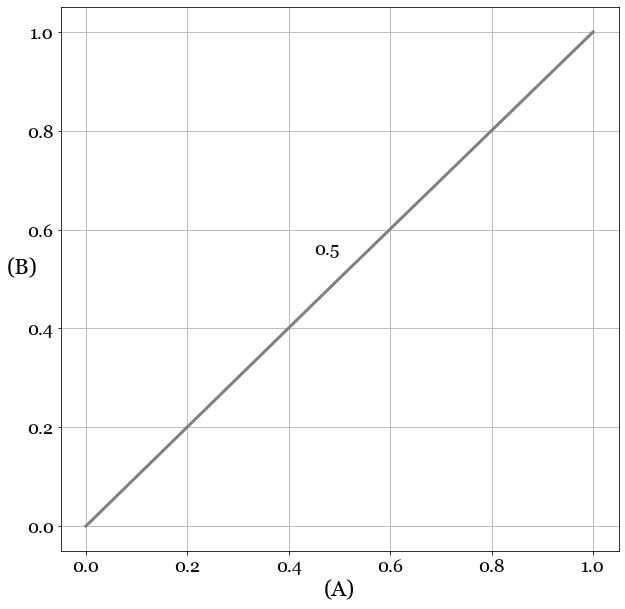